## Exam of Numerical Methods, 26 June 2024

### Exercise 1

The Lane-Emden differential equation is written as:

\begin{equation}\large
\frac{1}{\xi^2}\frac{d}{d \xi} \left(\xi^2 \frac{d \Theta}{d \xi} \right) + \Theta^n = 0 ,
\end{equation}

with conditions $\Theta(0) = 1$ and $\Theta'(0) = 0$. This equation is used to study the density profile of stars, assuming a polytropic equation of state, with index $n$.

1. Solve the equation for $n=1$ using a Runge-Kutta integrator at 4th order, in the range $0 < \xi < 10$. Plot $\Theta(\xi)$ and show that it is consistent with the analytical solution: $\Theta(\xi) = j_0(\xi) = {\sin(\xi)/\xi}$

2. Now repeat the same procedure for $n=5$, comparing with the analytical solution $\Theta(\xi) = \frac{1}{\sqrt{1+\xi^2/3}}$.

You are free to use python libraries for ODE integration, but you get bonus points if you write your own Runge-Kutta solver.

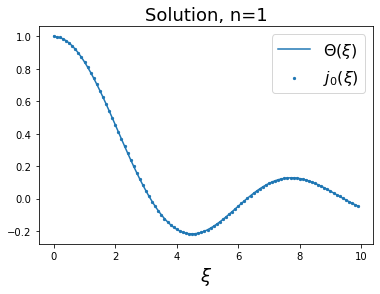

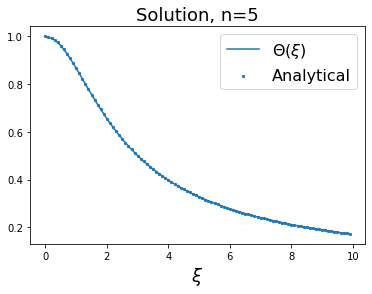

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# RK4 integrator
def rk4(f,specs):
    # Solve ODE with 4th order Runge-Kutta
    h = (specs['t1'] - specs['t0'])/specs['N']
    x = np.array(specs['x0'],dtype='float')
    Nequations = x.size
    xt = np.zeros((specs['N']+1,Nequations),dtype='float')
    xt[0,:] = x
    ts = np.arange(specs['t0'],specs['t1'],h)
    for i in range(len(ts)):
        t = ts[i]
        k1 = h*np.array(f(x,t))
        k2 = h*np.array(f(x+0.5*k1,t+0.5*h))
        k3 = h*np.array(f(x+0.5*k2,t+0.5*h))
        k4 = h*np.array(f(x + k3, t + h))
        x += (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        xt[i+1,:] = x        
    return ts, xt[:-1]

# Function to calculate Theta and Theta'
def g(theta,xi,n):
    theta0 = theta[0]
    theta1 = theta[1]
    f0 = theta1  # theta' = y
    if xi <= 1e-4:
        f1 = -theta0**n
    else:
        f1 = -theta0**n -(2.0/xi)*theta1
    return np.array([f0,f1])

specs = {'x0':[1.,0.], 't0':0., 't1':10., 'N': 100}

n = 1.
# Function f(x,t) to pass to the ODE integrator, fixing n=1
def f(theta,xi): return g(theta,xi,n)
t, x1 = rk4(f,specs)

# n=5 case
n=5
def f(theta,xi): return g(theta,xi,n)
t, x5 = rk4(f,specs)

# Plotting solutions for n=1 and n=5, and comparing with analytic expectations
plt.plot(t,x1[:,0],label= r'$\Theta(\xi)$')
analytical = [ ]
def j0(t): 
    if t < 1e-20:
        y = 1
    else:
        y = np.sin(t)/t
    return y
for t1 in t:
    analytical.append(j0(t1))
plt.scatter(t,analytical,s=5,label=r'$j_0(\xi)$')
plt.xlabel(r'$\xi$',size=18)
plt.legend(fontsize=16)
plt.title('Solution, n=1',fontsize=18)
plt.show()


def sol(t): return 1.0/np.sqrt(1.+t**2/3.0)
analytical = [ ]
for t1 in t:
    analytical.append(sol(t1))
plt.plot(t,x5[:,0],label= r'$\Theta(\xi)$')
plt.scatter(t,analytical,s=5,label=r'Analytical')
plt.title('Solution, n=5',fontsize=18)
plt.xlabel(r'$\xi$',size=18)
plt.legend(fontsize=16)
plt.show()

### Exercise 2

The Fermi-Dirac distribution is written as:

\begin{equation}\large
f(E) = \frac{1}{\exp{[(E-\mu)/kT]} + 1}
\end{equation}

The Fermi energy (chemical potential) $\mu$, for fixed $T$, can be found by adjusting its value in such a way as to normalize the distribution to $1$ in the allowed energy range for the particle. That is, you impose $G(\mu) = 1$, where:

\begin{equation}\large
G(\mu) \equiv \int_{E_{min}}^{E_{max}} f dE
\end{equation}

Assume your system is at room temperature $kT \simeq {1/40}$ eV and that the energy of the particles is constrained between $0$ and $2$ eV. Find $\mu$ for this case. Graphically verify that the result you found makes sense. 

root = 1.0000000000008642


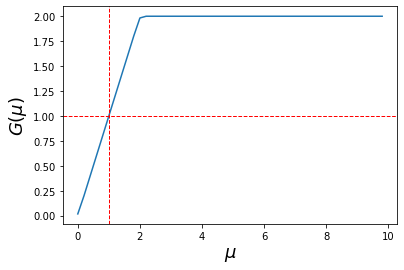

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy.optimize as opt

# Fermi Dirac distribution
def FD(E,mu,kT): return 1.0/(np.exp((E-mu)/kT)+1.0)

# Defining integral function G(mu), for given Emin, Emax boundaries and kT = 1/40
def G(mu):
    kT = 1.0/40.0
    Emin = 0.0
    Emax = 2.0
    G = integrate.quad(FD,Emin,Emax,args=(mu,kT))
    return G[0]


# Find mu as the root of G=1, via bisection method
a = 0.1
b = 3.0
def func(mu): return G(mu) - 1.0
root = opt.root_scalar(func, method='bisect', bracket=[a,b])
print('root =', root.root)

# Display the solution
muvec = [ ]
Gvec = [ ]
for mu in np.arange(0.,10.,0.2):
    muvec.append(mu)
    y = G(mu)
    Gvec.append(y)
plt.plot(muvec,Gvec)
plt.axhline(y=1.0,linestyle='dashed',color = 'red', lw = 1)
plt.axvline(x=root.root,ls='dashed',color='r',lw=1)
plt.xlabel(r'$\mu$',fontsize=18)
plt.ylabel(r'$G(\mu)$',fontsize=18)
plt.show()
